# Analysis of the PMC-Patients Dataset
Link to paper: https://arxiv.org/abs/2202.13876

In [1]:
from datasets import load_dataset


dataset = load_dataset("zhengyun21/PMC-Patients", split="train")

c:\Users\albbl\Documents\Studium\11_Semester\appendix\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

patients_summaries = dataset.to_pandas()
patients_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167034 entries, 0 to 167033
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patient_id         167034 non-null  int64 
 1   patient_uid        167034 non-null  object
 2   PMID               167034 non-null  int64 
 3   file_path          167034 non-null  object
 4   title              167034 non-null  object
 5   patient            167034 non-null  object
 6   age                167034 non-null  object
 7   gender             167034 non-null  object
 8   relevant_articles  167034 non-null  object
 9   similar_patients   167034 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.7+ MB


In [3]:
patients_summaries.head()

,patient_id,patient_uid,PMID,file_path,title,patient,age,gender,relevant_articles,similar_patients
0,0,7665777-1,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 60-year-old male was hospitalized due to ...,"[[60.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-2': 2, '7665777-3': 2, '7665777-4': ..."
1,1,7665777-2,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,A 39-year-old man was hospitalized due to an i...,"[[39.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-3': 2, '7665777-4': ..."
2,2,7665777-3,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,One week after a positive COVID-19 result this...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-4': ..."
3,3,7665777-4,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 69-year-old male was admitted to the ICU ...,"[[69.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."
4,4,7665777-5,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 57-year-old male was admitted to the ICU ...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."


### Compute the average length of all titles:

In [8]:
title_lengths = [len(title) for title in patients_summaries.title]
pd.Series(title_lengths).describe()

count    167034.000000
mean         96.153071
std          34.584621
min           7.000000
25%          71.000000
50%          92.000000
75%         117.000000
max         377.000000
dtype: float64

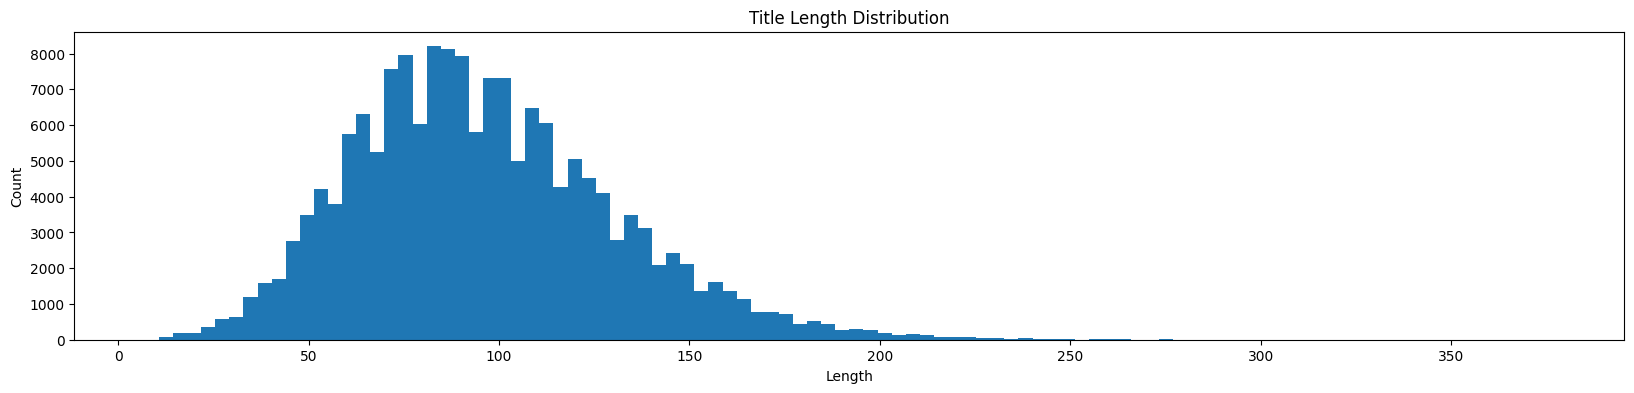

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
plt.hist(title_lengths, bins=100, label="count")
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Title Length Distribution')
plt.show()

### Compute the average length of all patient summaries:

In [10]:
summary_lengths = pd.Series([len(summary) for summary in patients_summaries.patient])
summary_lengths.describe()

count    167034.000000
mean       2765.333022
std        1659.310912
min          55.000000
25%        1645.000000
50%        2491.000000
75%        3529.000000
max       95400.000000
dtype: float64

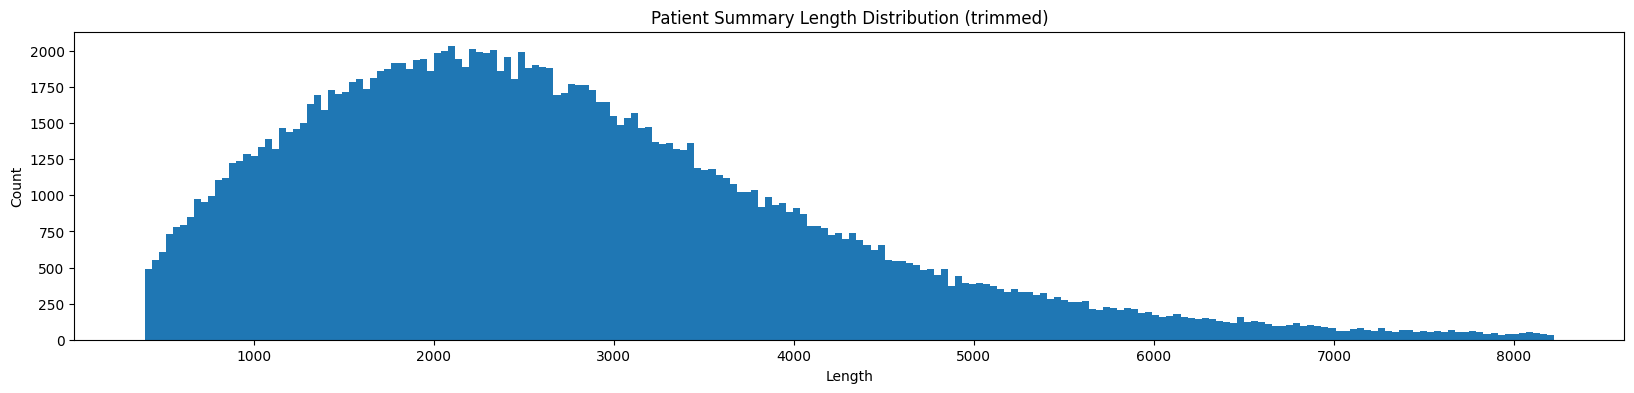

In [11]:
import numpy as np


quantile_1 = summary_lengths.quantile(0.01)
quantile_99 = summary_lengths.quantile(0.99)
index = summary_lengths[(summary_lengths >= quantile_99)|(summary_lengths <= quantile_1)].index

summary_lengths_cleaned = summary_lengths.drop(index, inplace=False)

plt.figure(figsize=(20, 4))
plt.hist(summary_lengths_cleaned, bins=200, label="count")
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Patient Summary Length Distribution (trimmed)')
plt.show()

### Generate random subsets for analysing the veterinary content:

In [ ]:
patients_summaries_samples = patients_summaries.sample(n=100, random_state=42)


In [ ]:
patients_summaries_samples.to_json("patients_summaries_samples", orient="records", lines=True, index=False)

Manual analysis of these random generated sample sets led to the following results:

|Sample Set|Veterinary Proportion|Extrapolation|
|:-----|:--------|:--------|
|Patients Summaries|1%|~ 1,670|